# **Project Title** :

# 📉 Predicting Customer Churn for Subscription-Based Businesses

##  Project Overview

In today's competitive digital economy, subscription-based businesses face a major challenge: **customer churn**. Companies lose millions in revenue due to churn, often without understanding the root causes. This project aims to tackle that challenge by analyzing customer behavior patterns, engagement rates, and transaction data to **predict churn risk** and provide actionable insights.

## Problem Statement

> **"Businesses lose millions due to customer churn, but most don't know why people leave."**

The inability to detect early churn signals limits a company's capacity to respond proactively. Understanding *why* customers churn is just as critical as *knowing* who will churn.

---

## Project Solution

This project uses a combination of **exploratory data analysis (EDA)**, **feature engineering**, and **data visualization** to uncover trends that lead to customer churn. I also leverage predictive modeling techniques to identify at-risk customers before they leave.

## **Business Objectives**


1. **Understand churn behavior** by identifying customer usage patterns and common churn traits.
2. **Determine key factors** that influence customer churn.
3. **Quantify the business impact** of churn (e.g., revenue loss, customer lifetime value).
4. **Predict churn risk** using machine learning.
5. **Communicate findings** through storytelling using Tableau dashboards.
6. **Recommend strategies** for churn mitigation and customer retention.


## Dataset Understanding

- **Source**: Kaggle  
  [`Predictive Analytics for Customer Churn: Dataset`](https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset)

  Data is contained under folder **data** which contains three files.

  1. **data_description.csv** - shows more information about dataset
  2. **train.csv** - contains all data in csv format for train
  3. **test.csv** - used for testing the model after training

- **Key Columns**:
  - `CustomerID`: Unique customer identifier  
  - `SubscriptionType`: Basic, Premium, or Deluxe  
  - `PaymentMethod`, `PaperlessBilling`  
  - `ViewingHoursPerWeek`, `AccountAge`, `TotalCharges`, `MonthlyCharges`  
  - `SupportTicketsPerMonth`, `UserRating`, `WatchlistSize`, etc.  


In cell bellow I import all Libraries with there alias

In [1]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cell below load data using pandas for data preparation and cleaning

In [2]:
# load data

churn_df = pd.read_csv('data/train.csv')
churn_df.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In cell above loads data and stores it under variable `churn_df` and output first `5` records of data using `.head()` method


Cell below I perform metadata summary  using **.info() method** to understand data interms of `data types`, `no of records`, `no of attributes` and `missing values`

In [3]:
# perform metadata summary

churn_df.info()  # Reveals missing data and dtype mismatches


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [4]:
"""The cell above shows that `churn_df` as total number of 243787 entries and 21 attributes.

churn_df as `5 float64 dtypes`, `5 int64 dtypes` and `11 object dtypes`.

There are no missing values."""

'The cell above shows that `churn_df` as total number of 243787 entries and 21 attributes.\n\nchurn_df as `5 float64 dtypes`, `5 int64 dtypes` and `11 object dtypes`.\n\nThere are no missing values.'

Below I find stastical summary of float and integer field using `.describe() method`

In [5]:
# statistics summary
churn_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


Cell above shows a quik summary of numeric number by showing `count, mean, std, min percitiles & max`.

Below I check dataframe shape using **.shape() method**

In [6]:
# check shape of the dataset
churn_df.shape

(243787, 21)

Cell above shows that churn_df as `243787 rows` and `21 columns`.

### **Data Cleaning**

In this section, I prepared the dataset for analysis and modeling by performing the following steps:

* **Handled Missing Values**
Identified and addressed null values using appropriate imputation strategies (mean, median, mode).

* **Removed Duplicates**
Checked for and removed any duplicate customer records to ensure data integrity.

* **Corrected Data Types**
Converted columns like TotalCharges to numeric types and ensured categorical fields were properly formatted.

* **Handled Outliers**
Detected and addressed extreme values in fields such as MonthlyCharges and SupportTicketsPerMonth.


For efficient data cleaning I group churn_df in `numeric_df` and `categorical_df` which stores numeric and categorical in different dataframe for cleaning.

In cell below I start with **numeric values** for cleaning and preparing for analysis


In [7]:
# select numeric columns from the dataset

numeric_df =churn_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'Churn']

The above cell I select all numeric columns in churn_df and store them under variable `numeric_df`

In [8]:
# check shape of numeric_df
churn_df[numeric_df].shape

(243787, 10)

The above cell shows shape of numeric_df which as `243787 rows` and `10 columns`

In cell below I check for missing values in numeric_df using method like `.isna(), isnull, notna()`

In [9]:
# check for missing values

(churn_df[numeric_df].isna().sum() / len(churn_df[numeric_df]))* 100 # check for missing values in numeric_df in percentage

AccountAge                  0.0
MonthlyCharges              0.0
TotalCharges                0.0
ViewingHoursPerWeek         0.0
AverageViewingDuration      0.0
ContentDownloadsPerMonth    0.0
UserRating                  0.0
SupportTicketsPerMonth      0.0
WatchlistSize               0.0
Churn                       0.0
dtype: float64

The above cell shows there are no missing values in numeric_df


In cell below checks for **Duplicates values** in numeric_df using `.duplicated()`

In [10]:
# check for duplicates in numeric_df

churn_df[numeric_df].duplicated().sum() # check for duplicates in numeric_df

np.int64(0)

Cell above shows there are no duplicates in numeric_df

The cell below I check for **outliers in numeric_df** using `boxplot` to check for extreme values

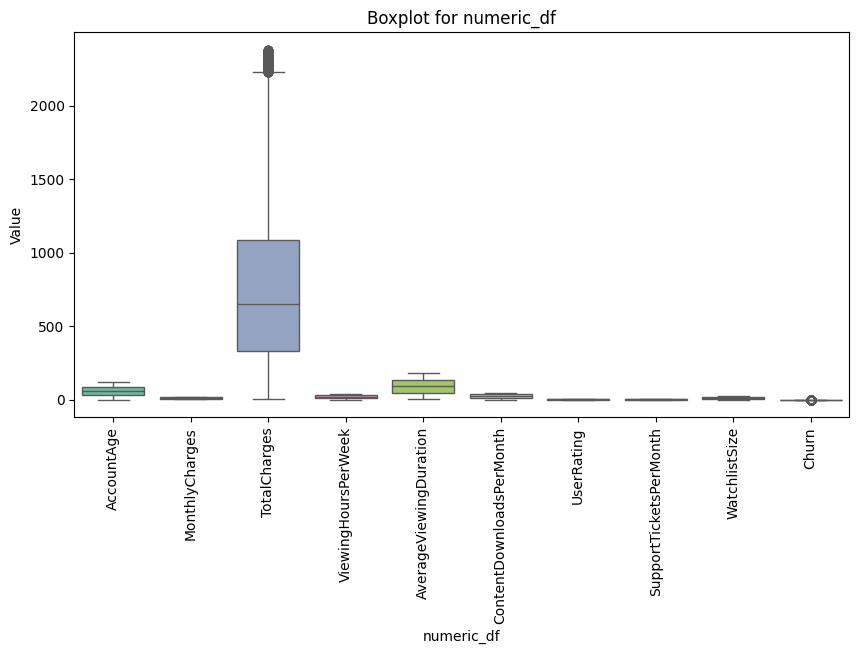

In [11]:
# check for outliers in numeric_df

# boxplot for numeric_df
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(churn_df[numeric_df], orient='v', palette='Set2')

ax.set_title('Boxplot for numeric_df')
ax.set_xlabel('numeric_df')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

plt.show()




Cell above show **column TotalCharges contains outliers** as there many dots above. Other columns are relatively clean does not have much outliers.

To remove the outliers write a function called **remove_outliers_iqr** which take two argument **dataframe and column**

In [12]:
# function to remove outliers

def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    column (str): The column name to check for outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers from numeric_df['TotalCharges']

churn_df = remove_outliers_iqr(churn_df, 'TotalCharges')

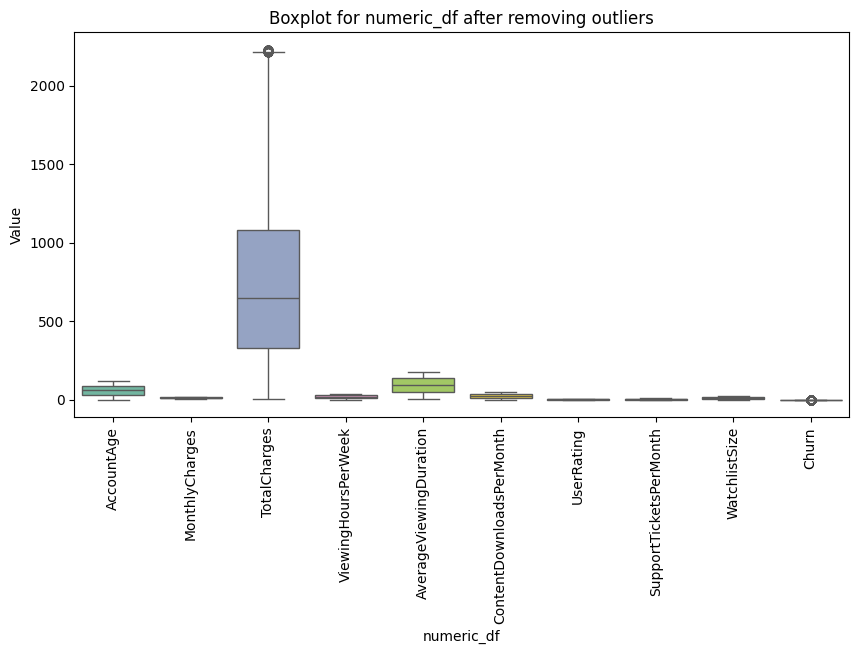

In [13]:
# check for outliers in numeric_df after removing outliers
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(churn_df[numeric_df], orient='v', palette='Set2')
ax.set_title('Boxplot for numeric_df after removing outliers')
ax.set_xlabel('numeric_df')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability
plt.show()

The cell above shows outliers have been removed successfully

For **numeric_df** data is clean and ready for analysis after cleaning

In cell below I select all categorical columns in churn_df for cleaning and prepare for analysis.
The values are stored under variable `categorical_df`

In [14]:
# select categorical columns from the dataset

categorical_df =  churn_df.select_dtypes(include=[np.object_]).columns.tolist()
categorical_df

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'CustomerID']

In cell above  I selects all categorical columns from churn_df and store them under variable `categorical_df`

In cell below I check for `values_counts` which shows **unique values** in dataframe 

In [15]:
# values_counts for categorical_df

churn_df[categorical_df].value_counts().sum()



np.int64(243046)

The cell above shows that categorical_df might be have some few duplicates as it unique values are 243046 from 243787.

In cell below I check for duplicates

In [16]:
# check for duplicates in categorical_df

churn_df[categorical_df].duplicated().sum() # check for duplicates in categorical_df

np.int64(0)

Cell above shows categorical_df contains no duplicates so maybe the the the value of categorical unique value shows the 

In [17]:
# check for missing values in categorical_df

(churn_df[categorical_df].isna().sum() / len(churn_df[categorical_df]))* 100 # check for missing values in categorical_df in percentage

SubscriptionType     0.0
PaymentMethod        0.0
PaperlessBilling     0.0
ContentType          0.0
MultiDeviceAccess    0.0
DeviceRegistered     0.0
GenrePreference      0.0
Gender               0.0
ParentalControl      0.0
SubtitlesEnabled     0.0
CustomerID           0.0
dtype: float64

Cell Above shows categorical_df as no duplicates 

In [18]:
churn_df.shape # check shape of the dataset after removing outliers

(243046, 21)

## **EXPLATORARY DATA ANALYSIS(EDA)**

#### **Goals** :

Find patterns and trends that facilitates churn of customers.

To achieve this I derieved the following guiding objectives for entire analysis:

**Guiding Questions for Customer Churn Analysis**

1. **General Customer Behavior**

* What are the common behavior patterns or usage trends among churned customers?
* How does customer engagement differ between churned and retained users?
e.g., viewing hours per week, content downloads per month, user rating, support tickets.
* What factors contribute most to customer churn?

2. **Subscription Plan & Engagement**

* Which subscription plan has the highest churn rate? (Basic, Premium, Deluxe)
* Does the type of content watched influence churn?
* Do churned customers have a lower or higher number of downloads per month?
* Is watchlist size affected before churn?
* Do churned customers have lower account age or engagement duration?

3. **Demographics & User Profile**

* Are churned customers mostly male or female?
* What is the age distribution of churned customers compared to retained ones?
* Do they mostly use one type of device (e.g., mobile, tablet, smart TV)?
* Are there specific user segments (e.g., genre preference, multi-device access) that are more likely to churn?

4. **Billing & Payment Behavior**

* Do churned users mostly use a specific payment method?
* How do their monthly charges and total charges compare to retained customers?
* Are certain payment methods or billing preferences linked to higher churn?
* Does a drop in total monthly charges correlate with churn?

5. **Parental Controls & User Settings**

* Does enabling or disabling parental controls impact churn?
* Are customers who enable subtitles more or less likely to churn?
* How does having multiple device access affect churn?

6. **Time-Based Trends**

* How has churn rate changed over time (monthly/yearly)?
* Are there seasonal spikes or drops in churn rate?

7. **Retention Strategy Insights**

* Are there early warning signs (drop in engagement, support tickets) that a customer is about to churn?
* What actionable retention strategies can be suggested based on behavior patterns?
* How can customer lifetime value (CLV) be maximized using these insights?

In [19]:
# differentiating between churners and non-churners
churn_df['Churn'].value_counts() # check for churners and non-churners

Churn
0    198952
1     44094
Name: count, dtype: int64

The above cell I check for total number of customers who churned and not. `0 shows those not churned` and `1 shows those hurned`



Perform correlation for numeric values to identify strongly correlated attribute to churn

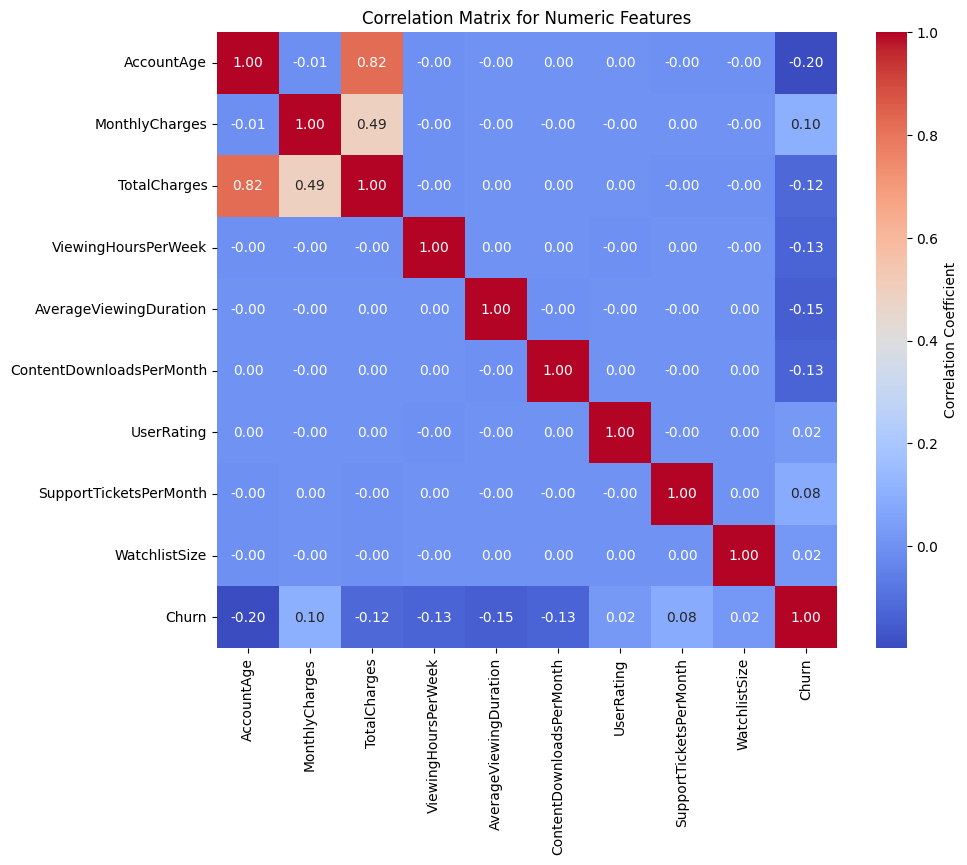

In [20]:
# correlation matrix for numeric_df

corr = churn_df[numeric_df].corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Numeric Features')
plt.show()


No single numeric feature alone explains churn well.

Churn is likely a multifactorial problem where interaction effects (e.g. low watch time + high monthly cost) matter more than individual variables.



Cell below **finds which behaviour patterns or usage trends are common among customers who churn

I groupby data by `churn` and find the aggregation of attribute such as subscription, payment method etc

In [21]:
# finds the  behavior of the churners and non-churners in the dataset

# group by churn and calculate the mean attribute values

churn_grouped = churn_df.groupby('Churn').agg({
    'AccountAge': 'mean',
    'TotalCharges': 'mean',
    'MonthlyCharges': 'mean',
    'SupportTicketsPerMonth': 'mean',
    'AverageViewingDuration': 'mean',
    'ViewingHoursPerWeek': 'mean',
    'ContentDownloadsPerMonth' : 'mean',
    
}).reset_index()

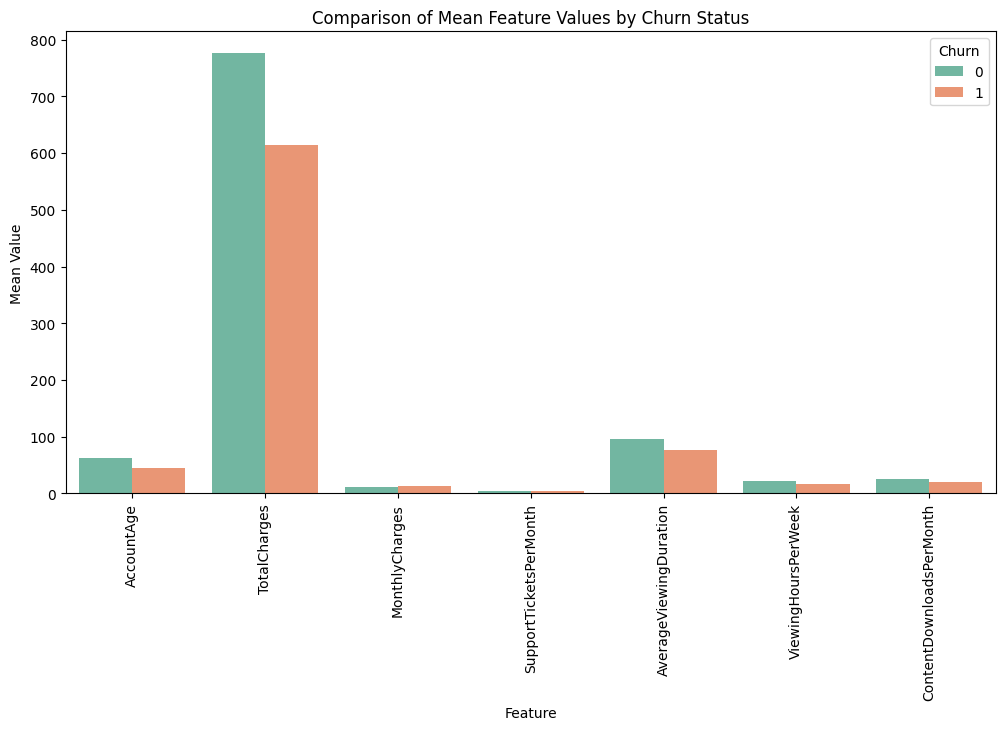

In [22]:
# Set 'Churn' column as index before transposing
churn_grouped_transposed = churn_grouped.set_index('Churn').T
churn_grouped_transposed.reset_index(inplace=True)
churn_grouped_transposed.rename(columns={'index': 'Feature'}, inplace=True)


# plot the churn_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))

# Melt the data to long format so we can plot with hue
df_melted = churn_grouped_transposed.melt(id_vars='Feature', var_name='Churn', value_name='MeanValue')

sns.barplot(x='Feature', y='MeanValue', hue='Churn', data=df_melted, palette='Set2')

ax.set_title('Comparison of Mean Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Mean Value')
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Churn', loc='upper right')
plt.show()



### **Observations** :

**Total Charges**:

* Customers who did not churn have significantly higher total charges.
* This suggests that loyal customers tend to stay longer and hence accumulate more charges over time.

**Account Age**:

* Non-churners have a higher account age, indicating that customers who have been subscribed longer are less likely to churn.
* This reinforces the idea that early churn is more common, and once customers cross a certain tenure, they are likely to stay.

**Average Viewing Duration**:

* Non-churners show higher average viewing duration than churners.
* This implies that more engaged users, who consume more content, are less likely to leave.

**Viewing Hours Per Week**:
* Similar to the above, churners watch fewer hours per week, showing lower engagement.
* Content Downloads Per Month:
* Non-churners download more content, indicating they are more active on the platform and find value in it.

**Monthly Charges**:

* There is little difference in monthly charges between churners and non-churners, suggesting that pricing alone may not be a key churn factor.

**Support Tickets Per Month**:

* Churners might have a slightly higher support ticket count, though the values are small. This could imply frustration or issues with the service leading to churn.




Cell below I encode categorical values to find the patterns for non-churners and churners.

First I check for multiclass and binary categories using `value_count()`


In [23]:
# List of categorical columns
categorical_cols = [
    'SubscriptionType',
    'PaymentMethod',
    'PaperlessBilling',
    'ContentType',
    'MultiDeviceAccess',
    'DeviceRegistered',
    'GenrePreference',
    'Gender',
    'ParentalControl',
    'SubtitlesEnabled'
]

# Loop through and display value counts for each
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(churn_df[col].value_counts(dropna=False))
    print("-" * 40)


Value counts for 'SubscriptionType':
SubscriptionType
Standard    81681
Basic       80794
Premium     80571
Name: count, dtype: int64
----------------------------------------
Value counts for 'PaymentMethod':
PaymentMethod
Electronic check    61127
Credit card         60732
Bank transfer       60601
Mailed check        60586
Name: count, dtype: int64
----------------------------------------
Value counts for 'PaperlessBilling':
PaperlessBilling
No     121611
Yes    121435
Name: count, dtype: int64
----------------------------------------
Value counts for 'ContentType':
ContentType
Both        81499
TV Shows    80901
Movies      80646
Name: count, dtype: int64
----------------------------------------
Value counts for 'MultiDeviceAccess':
MultiDeviceAccess
No     121653
Yes    121393
Name: count, dtype: int64
----------------------------------------
Value counts for 'DeviceRegistered':
DeviceRegistered
Tablet      60961
Computer    60942
Mobile      60738
TV          60405
Name: count, dt

The cell above shows all categories contained on the categorical attributes listed on the list above.

Cell below I create a copy of churn_df and stored it under variable `churn_encoded` and **encode** the attribute to aggregate them to discover pattern and trends why customer churn

In [24]:
# create a copy of the churn_df for encoding
churn_encoded = churn_df.copy()

# encode ('Basic': 0, 'Standard': 1, 'Premium': 2)
churn_encoded['SubscriptionType'] = churn_encoded['SubscriptionType'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})

# ('movies' : 0, 'TV shows' : 1, 'Both' : 2)
churn_encoded['ContentType'] = churn_encoded['ContentType'].map({'movies' : 0, 'TV shows' : 1, 'Both' : 2})
# ('No' : 0, 'Yes' : 1)
churn_encoded['PaperlessBilling'] = churn_encoded['PaperlessBilling'].map({'No': 0, 'Yes': 1})
churn_encoded['MultiDeviceAccess'] = churn_encoded['MultiDeviceAccess'].map({'No': 0, 'Yes': 1})
churn_encoded['DeviceRegistered'] = churn_encoded['DeviceRegistered'].map({'No': 0, 'Yes': 1})
churn_encoded['ParentalControl'] = churn_encoded['ParentalControl'].map({'No': 0, 'Yes': 1})
churn_encoded['SubtitlesEnabled'] = churn_encoded['SubtitlesEnabled'].map({'No': 0, 'Yes': 1})
# (comedy':0, 'Fantasy':1, 'Drama' : 2, 'Action' : 3, 'Sci-Fi' :4)
churn_encoded['GenrePreference'] = churn_encoded['GenrePreference'].map({'comedy':0, 'Fantasy':1, 'Drama' : 2, 'Action' : 3, 'Sci-Fi' :4})
churn_encoded['SubtitlesEnabled'] = churn_encoded['SubtitlesEnabled'].map({'No': 0, 'Yes': 1})
churn_encoded['Gender']= churn_encoded['Gender'].map({'Female' :0, 'Male' :1})
# ('Credit card' :0, 'Bank transfer' :1, 'Electronic check' :2, 'Mailed check' :3)
churn_encoded['PaymentMethod'] = churn_encoded['PaymentMethod'].map({'Credit card' :0, 'Bank transfer' :1, 'Electronic check' :2, 'Mailed check' :3})


In [25]:
# check the shape of the churn_encoded dataframe
churn_encoded.shape

(243046, 21)

Perfomed group by to group the attribute with the `churn attribute` to uncover patterns and trends

In [26]:
# Group by 'Churn' and calculate the sum of each categorical feature
cat_grouped = churn_encoded.groupby('Churn').agg({
    'GenrePreference': 'sum',
    'SubscriptionType': 'sum',
    'PaymentMethod': 'sum',
    'PaperlessBilling': 'sum',
    'ContentType': 'sum',
    'MultiDeviceAccess': 'sum',
    'DeviceRegistered': 'sum',
    'ParentalControl': 'sum',

}).reset_index()

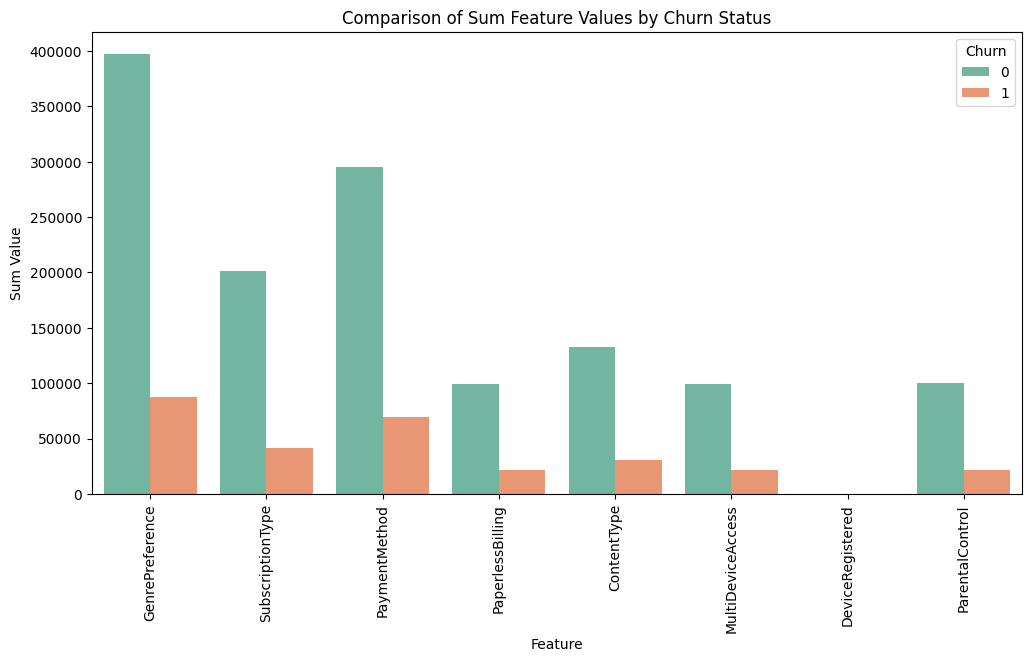

In [ ]:
# plot the cat_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))

# Melt the data to long format so we can plot with hue
df_melted = cat_grouped.melt(id_vars='Churn', var_name='Feature', value_name='SumValue')

sns.barplot(x='Feature', y='SumValue', hue='Churn', data=df_melted, palette='Set2')
ax.set_title('Comparison of Sum Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Sum Value')
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Churn', loc='upper right')
plt.show()

**Observations** :

**Genre Preference**

* Customers who churned show a significantly lower total value for GenrePreference compared to those who stayed.
* This could imply that limited or unsatisfactory genre options may be contributing to customer dissatisfaction and churn.
* *Recommendation*: Consider expanding content genres or using personalized genre suggestions to boost engagement.

2. **Subscription Type**

* The churned group has a much lower total SubscriptionType score.
* This suggests that certain subscription plans may not be meeting customer needs—perhaps due to pricing, features, or flexibility.
* *Recommendation*: Conduct user surveys or A/B testing on subscription models to optimize offerings.

3. **Payment Method**

* A noticeable drop for churned customers here as well.
* The payment process or preferred payment options could be causing friction.
* *Recommendation*: Analyze which payment methods are more churn-prone and consider introducing more user-friendly or flexible payment options.

4. **Paperless Billing**
* The churned group interacts less with paperless billing features.
* This could indicate either a lack of awareness or lower tech adoption among those customers.
* *Recommendation*: Improve onboarding processes or provide incentives for adopting paperless billing.

5. **Content Type**

* The churned customers have much lower total engagement with different content types.
* This might reflect a lack of content diversity or relevance for these users.
* *Recommendation*: Use content analytics to tailor content types based on user segments.

6. **Multi-Device Access**

* A sharp difference here—non-churned customers use this feature more.
* Users who can access the service across multiple devices seem more likely to stay.
* *Recommendation*: Highlight multi-device accessibility as a value proposition in marketing and onboarding.

7. **Device Registered**

* Very low or zero values may indicate missing data or a feature not used.

8. **Parental Control**

* Again, churned users show lower usage.
* Users with families or children might not be finding these controls effective or easy to use.
* *Recommendation*: Enhance usability and visibility of parental control features.



In cell creates a barplot to compare the percent of customer churn based on Genrepreference. First I group the `GenrePreference` and `Churn` then find the size of the group by data then assigns it under column `count`

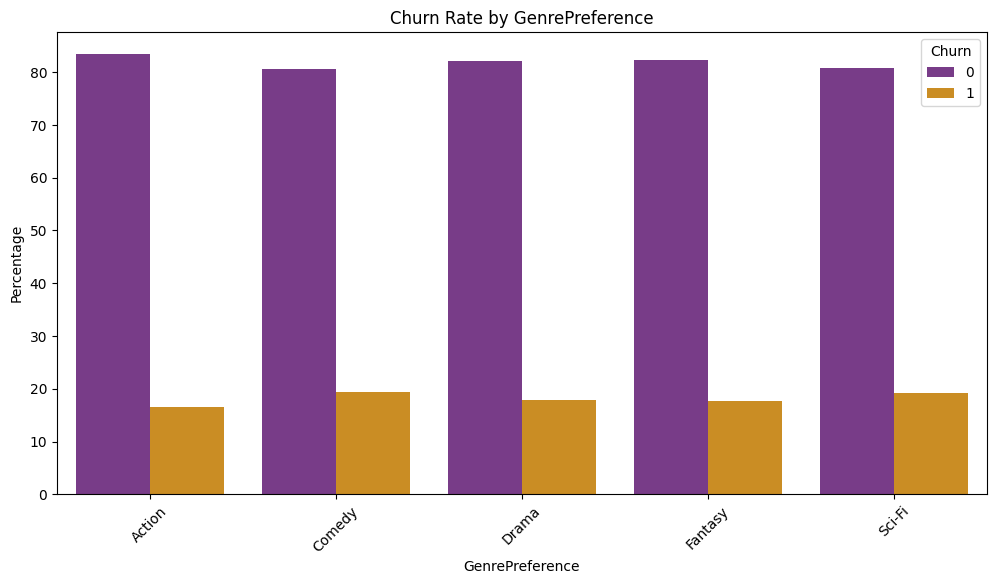

In [40]:


# Create a normalized frequency table of churn by genre
genre_churn = churn_df.groupby(['GenrePreference', 'Churn']).size().reset_index(name='Count')

# Normalize to get percentages within each genre
genre_churn['Percent'] = genre_churn.groupby('GenrePreference')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot
fig, ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='GenrePreference', y='Percent', hue='Churn', data=genre_churn, palette='CMRmap')

ax.set_title('Churn Rate by GenrePreference')
ax.set_xlabel('GenrePreference')
ax.set_ylabel('Percentage')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn', loc='upper right')
plt.show()


**Observation** :

* Across all genres (Action, Comedy, Drama, Fantasy, Sci-Fi), the majority of customers did not churn (represented by the purple bars).
* The churn rate (yellow bars) is relatively consistent across genres, ranging roughly between 16% to 19%.
* Comedy and Sci-Fi fans show slightly higher churn rates compared to the other genres.
* No genre shows a significantly higher or lower impact on churn, suggesting that genre preference has limited influence on customer churn.


✅ **Recommendations**

**Monitor High-Churn Genres (Comedy, Sci-Fi)**:

* Since Comedy and Sci-Fi have slightly higher churn rates, consider reviewing the content quality, frequency of new releases, or viewer engagement in these genres.
* Collect user feedback to identify potential dissatisfaction.

**Personalize Content Recommendations**:

* Use genre preference as part of your churn prediction model, even if it's not a strong standalone indicator.
* Tailor recommendations to reinforce viewer engagement—e.g., suggest trending Action/Drama titles to those with high retention rates.

**A/B Test Genre-Focused Campaigns**:

* Run targeted campaigns for high-churn genres (like offering exclusive Comedy/Sci-Fi content or early access) to test if such interventions reduce churn.

**Diversify User Exposure**:

* Encourage users to explore genres with lower churn (e.g., Action, Drama) through homepage promotions or watchlist suggestions.

**Avoid Over-investing Based Solely on Genre**:

* Since the churn rates don’t drastically differ between genres, avoid making major investment shifts based only on genre preference without deeper behavioral analysis.

**Combine Genre with Other Factors**:

* Merge genre preference with other insights (e.g., watch time, satisfaction ratings, device used) for a more complete churn prediction strategy.





The cell below plots `SubscriptionType', 'Churn'` by grouping them first and find it size and store it under `count` to find pecent then plot

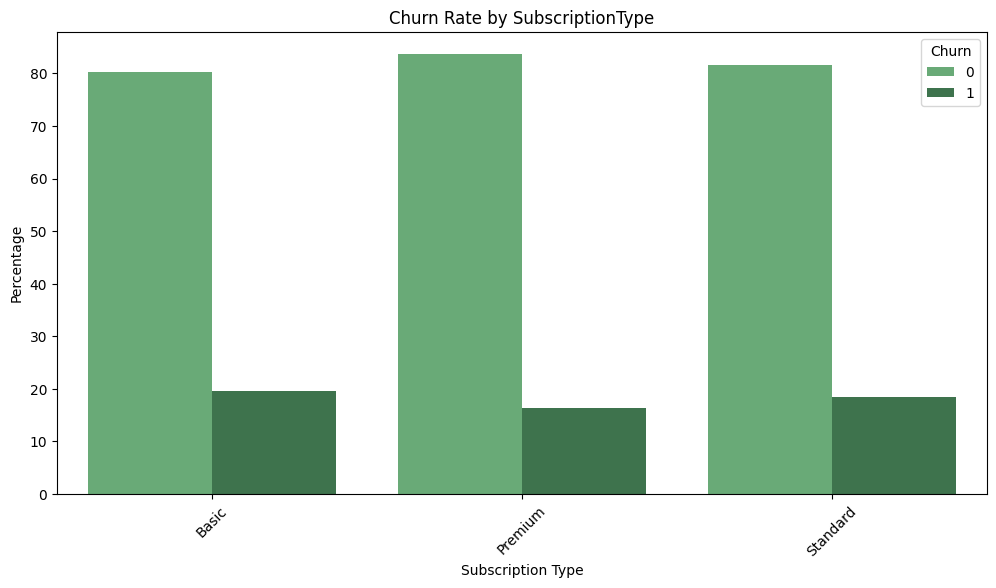

In [41]:


# Create a normalized frequency table of churn by genre
genre_churn = churn_df.groupby(['SubscriptionType', 'Churn']).size().reset_index(name='Count')

# Normalize to get percentages within each genre
genre_churn['Percent'] = genre_churn.groupby('SubscriptionType')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot
fig, ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='SubscriptionType', y='Percent', hue='Churn', data=genre_churn, palette='Greens_d')

ax.set_title('Churn Rate by SubscriptionType')
ax.set_xlabel('Subscription Type')
ax.set_ylabel('Percentage')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn')
plt.show()



**Observations from Churn Rate by Subscription Type**

**Churn is Highest for Basic Subscribers (~20%)**

* Basic plan users exhibit the highest churn rate compared to Premium and Standard users.
* This could be due to limited features, lower video quality, or dissatisfaction with the value they receive.

**Premium Users Have the Lowest Churn (~16%)**

* Premium plan holders appear to be the most loyal segment.
* Possibly due to enhanced benefits like more screens, HD/Ultra HD, or exclusive content justifying the cost.

**Standard Plan Falls in the Middle (~18%)**

* Standard users have a moderate churn rate, showing it’s not significantly better or worse than Basic.
* Indicates that price-sensitive users may upgrade/downgrade based on perceived value.
* Most Users Regardless of Plan Did Not Churn

**Across all plans, the majority of customers stayed (~80–84% retention)**.

* This suggests that subscription type alone is not a major driver of churn, but can play a role when combined with other factors (e.g., content satisfaction, tech issues, payment friction).


✅ **Recommendations to Reduce Churn**

1. **Enhance Basic Plan Value**

* Add minor feature upgrades to the Basic plan without significantly increasing cost — e.g., extra screen, better resolution, or occasional premium content access.
* This could make Basic users feel more valued and reduce the high churn rate observed.

2. **Promote the Premium Plan**

* Since Premium users have the lowest churn, consider incentivizing upgrades through promotions, free trials, or upgrade discounts.
* Run targeted campaigns like: “Upgrade to Premium for 1 month free”.

3. **Analyze and Address Pain Points for Basic & Standard Users**

* Conduct feedback surveys specifically for users on Basic and Standard plans to understand dissatisfaction.
* Look into technical support requests, payment issues, or usage drop-offs from these segments.

4. **Implement Tiered Loyalty Rewards**

* Reward long-term users regardless of plan with loyalty perks (e.g., discounts, free month, early access to new features).
* This builds emotional commitment and reduces the urge to cancel.

5. **Monitor and Optimize Payment Processes**

* Even though payment method isn’t shown here, if technical issues are suspected, audit the payment failure logs and optimize retry logic or customer alerts.
* Offer multiple flexible payment methods (e.g., mobile money, debit/credit, PayPal).

In cell below I combine both `SupportTickect, PaymentMethod & ContentType` with `Churn` to try find patterns that make customers churn

In [42]:
# group by churn and calculate the mean attribute values

content_grouped = churn_encoded.groupby('Churn').agg({
    'SupportTicketsPerMonth': 'mean',
    'PaymentMethod': 'mean',
    'ContentType': 'mean',
}).reset_index()

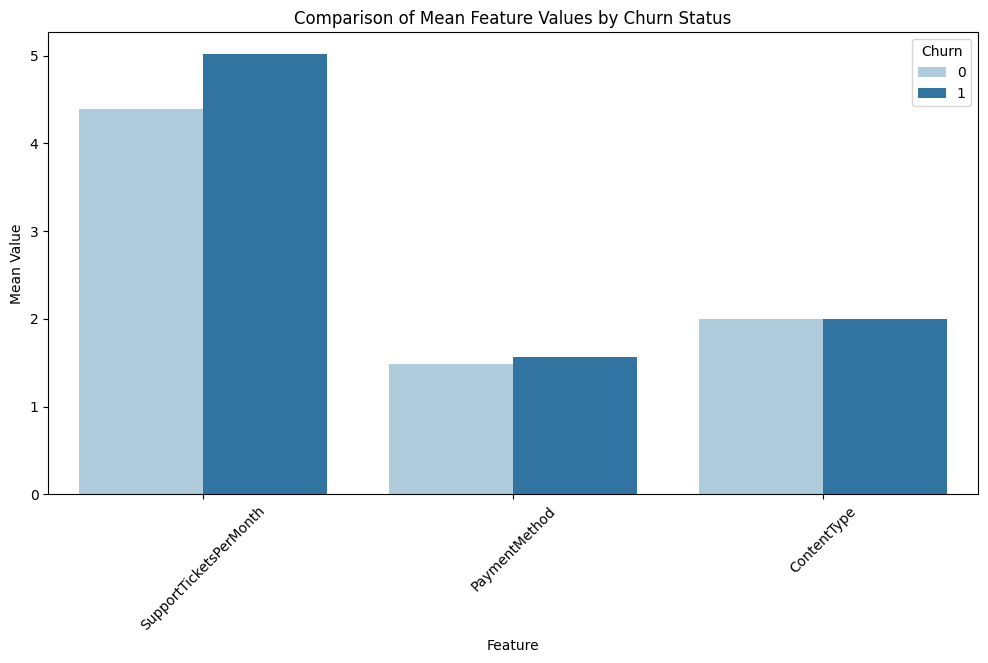

In [46]:
# plot the content_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))

# Melt the data to long format so we can plot with hue
df_melted = content_grouped.melt(id_vars = 'Churn', var_name='Feature', value_name='MeanValue')

sns.barplot(x='Feature', y='MeanValue', hue='Churn', data=df_melted, palette='Paired')
ax.set_title('Comparison of Mean Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Mean Value')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn', loc='upper right')
plt.show()


📊 **Observation**

1. **SupportTicketsPerMonth**

* Churned users (Churn = 1) have a higher average number of support tickets per month (~5) compared to non-churned users (~4.4).
* This suggests that customers who experience more issues (or at least reach out for more support) are more likely to churn.

2. **PaymentMethod**

* There's a slightly higher average PaymentMethod value for churned users. While the difference is small, it might hint at a correlation with certain payment methods being less reliable or convenient.

3. **ContentType**

* The mean values for ContentType are almost the same for both churned and retained users.
* This indicates that ContentType does not significantly influence churn behavior.



✅ **Recommendations Based on the Observations**

1. **Reduce Support-Related Friction**

* 📞  Improve customer support quality and speed to resolve issues more effectively before they escalate to churn.
* 📋 Implement a ticket classification system to flag customers with a high number of support requests as "at-risk."
* 🤖 Consider chatbots or self-service solutions for quick resolution of common issues.


2. **Content Strategy Can Remain Stable**

* 🎥 Since ContentType doesn't seem to affect churn, focus less on adjusting content variety or format as a churn-reduction strategy.
* Instead, prioritize enhancing user experience around service delivery and technical support.

3. **Churn Prediction Triggers**

* Use high support ticket volume as a key feature in a churn prediction model.
* Customers who log more tickets can be targeted with personalized retention offers, proactive check-ins, or escalation to higher-tier support.



## **Subscription Plan & Engagement**

In cell below I find patterns on how contentye affect customer churn

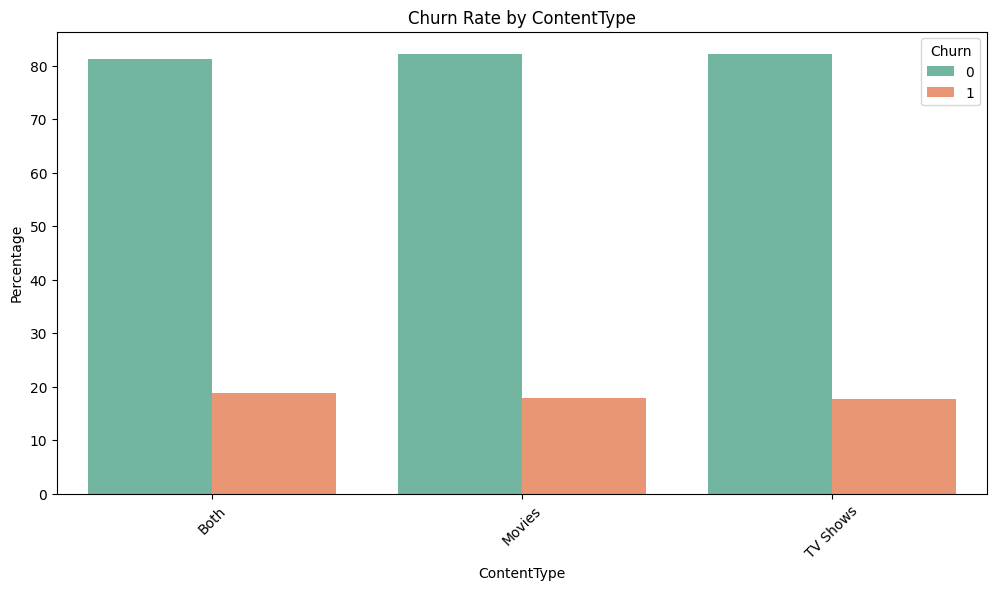

In [53]:
# group by 
contenttype_grouped = churn_df.groupby(['Churn', 'ContentType']).size().reset_index(name='Count')

# Normalize to get percentages within each genre

contenttype_grouped['Percent'] = contenttype_grouped.groupby('ContentType')['Count'].transform(lambda x: x / x.sum() * 100)

# plot
fig, ax=plt.subplots(figsize=(12, 6))
sns.barplot(x='ContentType', y='Percent', hue='Churn', data=contenttype_grouped, palette='Set2')
ax.set_title('Churn Rate by ContentType')
ax.set_xlabel('ContentType')
ax.set_ylabel('Percentage')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn')
plt.show()

📊 **Observations**

1. **Overall Churn Rates Are Similar Across Content Types**

* Whether users prefer Movies, TV Shows, or Both, the churn rate remains consistently low, around 17–19%.
* Conversely, the retention rate (Churn = 0) is high in all categories (~81–83%).

2. **Slight Variation Between Content Preferences**

* Users who watch both Movies and TV Shows have a slightly higher churn rate (19%) compared to those who only watch Movies or TV Shows (both around 17–18%).
* However, these differences are minimal and may not be statistically significant.

✅ **Recommendations**

1. **ContentType Alone is Not a Strong Churn Indicator**

* Since churn rates are consistently low across all content types, ContentType by itself should not be prioritized in churn prediction models or retention strategies.

2.**Content Strategy Appears Effective**
The similar churn distribution suggests that the current content mix is well-balanced and appealing to all user groups.

📌 Maintain the current variety of content types (Movies, TV Shows, and Both) as no specific type is driving higher churn.

In [72]:
# churn rate by content type, viewing hours per week and average viewing duration

# group by churn and calculate the mean attribute values

content_grouped2 = churn_encoded.groupby(['ContentType',  'Churn']).agg({
    'ViewingHoursPerWeek': 'mean',
    'AverageViewingDuration': 'mean',
    'ContentDownloadsPerMonth': 'mean',
    'SupportTicketsPerMonth': 'mean',
    'GenrePreference': 'mean',
    
}).reset_index()

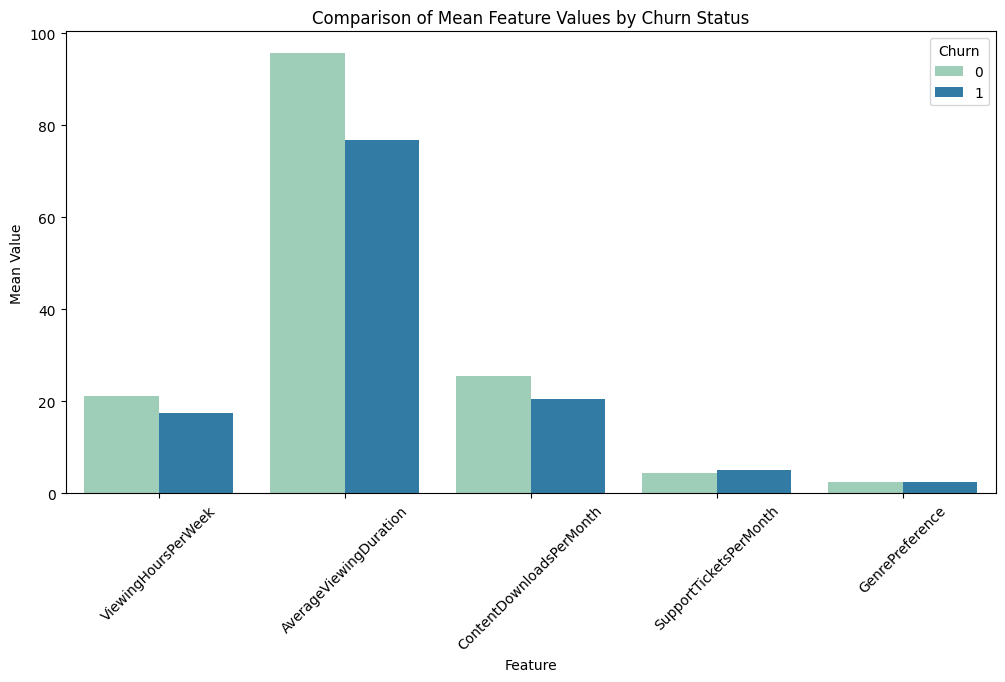

In [73]:
# plot the content_grouped2 dataframe

fig, ax = plt.subplots(figsize=(12, 6))

# Melt the data to long format so we can plot with hue
df_melted = content_grouped2.melt(id_vars= ['ContentType', 'Churn'], var_name='Feature', value_name='MeanValue')
sns.barplot(data=df_melted, x='Feature', y='MeanValue', hue='Churn', palette='YlGnBu')
ax.set_title('Comparison of Mean Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Mean Value')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn', loc='upper right')
plt.show()




📊 **Observations**

1. **Viewing Hours Per Week**

* Churned users consistently have lower average viewing hours compared to retained users across all content types.
*Suggests less engagement might lead to churn.

2. **Average Viewing Duration**

* Retained users tend to have longer average viewing sessions.
* Indicates that users who stay longer tend to consume content in longer stretches.

3. **Content Downloads Per Month**

* Non-churned users have higher download activity.
* Downloads may indicate commitment (e.g., for offline viewing), which correlates with retention.

4. **Support Tickets Per Month**

* Churned users open slightly more support tickets.
* While not dramatic, this may point to dissatisfaction or friction in user experience.

5. **Genre Preference**

* Not a significant difference between churned and retained users.
* Might mean genre alone is not a strong churn predictor in isolation.


✅ **Recommendations**

🎯 1. **Encourage Longer Engagement**

* Target users with low viewing hours or short durations with personalized content suggestions.
* Send notifications or nudges when users are inactive for days.

📥 2. **Promote Content Downloads**

* Highlight the offline download feature to new users as a way to stay connected.
* Add incentives like "Download X shows, get bonus content."

🛠️ 3. **Improve Support Experience**

* Investigate common issues raised in support tickets by churned users.
* Offer real-time chat support or in-app resolution features for friction points.

Cell below finds patterns how payment methods affect customer churn

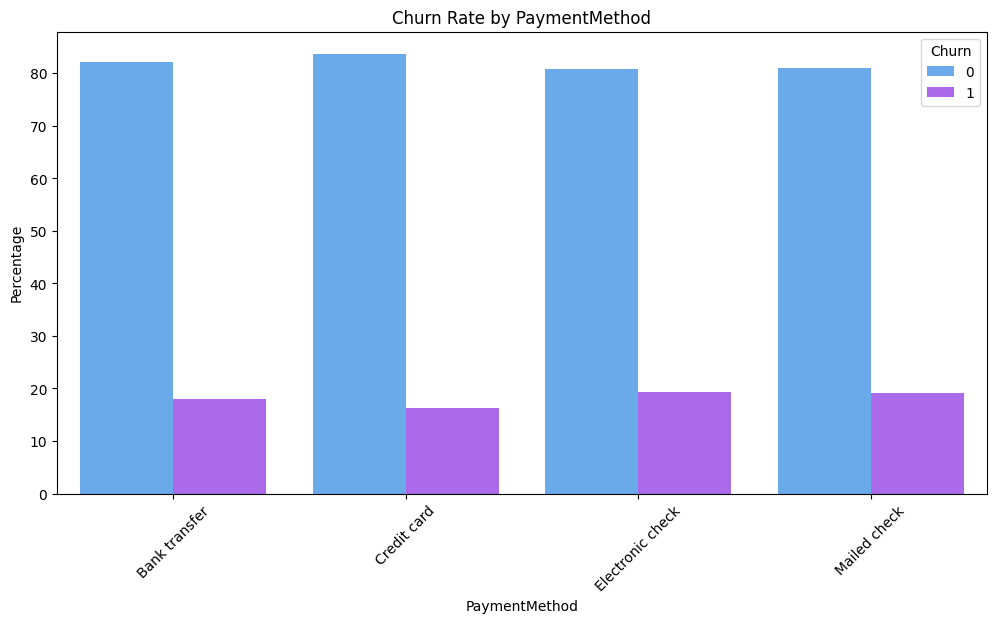

In [77]:
# payment method by churn rate

# group by churn and calculate the mean attribute values

payment_grouped = churn_df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')
payment_grouped['percent'] = payment_grouped.groupby('PaymentMethod')['Count'].transform(lambda x: x / x.sum() * 100)

# plot the payment_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=payment_grouped, x='PaymentMethod', y='percent', hue='Churn', palette='cool')
ax.set_title('Churn Rate by PaymentMethod')
ax.set_xlabel('PaymentMethod')  
ax.set_ylabel('Percentage')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Churn')
plt.show()

📊 **Analysis & Observations**

**Lower Churn with Bank Transfers and Credit Cards**:

* Bank Transfer and Credit Card methods have the lowest churn rates (Churn = 1).
* This suggests these customers are more likely to remain loyal.

**Higher Churn with Electronic and Mailed Checks**:

* Users paying by Electronic Check and Mailed Check show slightly higher churn rates.
* This could reflect less convenience, more effort, or weaker commitment to the service.

**Retention Is Generally High Across All Payment Methods**:
Across the board, churn is below 20%, and retention (Churn = 0) is above 80%.


✅ **Recommendations**

**Promote Auto-Pay Methods (Bank Transfer / Credit Card)**:

* Encourage users to switch to bank transfer or credit card payments.
* Consider offering small discounts or perks for enabling auto-pay via these methods.

**Reevaluate Electronic & Mailed Check Users**:

* **Explore why these users are churning more. Is it due to**:

* Payment failure rates?
* User profile differences?
* Inconvenience or technical issues?
* Consider surveys or exit feedback from these users.

**Targeted Retention Campaigns**:

* Design retention strategies specifically for users using check-based payments.
* Send reminders, simplify the payment process, or provide incentives to switch methods.

**Add a Payment Preference Metric to Onboarding**:
* During user signup, subtly guide new users toward low-churn payment methods.



### **Conclusion on Factors Contributing to Customer Churn**

Based on the analysis, the following factors have been identified as key contributors to customer churn:

1. **TotalCharges**: Customers with lower or irregular total charges tend to churn more often, possibly indicating limited engagement with the service.

2. **Viewing Duration**: Customers who consume less content, as indicated by lower viewing hours per week, show a higher likelihood of churning. This suggests reduced satisfaction or interest.

3. **Genre Preference**: Limited or unsatisfactory genre preferences appear to influence churn. Customers may leave if their content interests are not adequately met.

4. **Subscription Type**: The **Basic** subscription tier shows the highest churn rate, potentially due to limited features or perceived lack of value.

5. **Content Genres**: Specific genres such as **Comedy** and **Sci-Fi** have been associated with higher churn rates, suggesting these genres may not be meeting customer expectations or needs.

6. **Customer Support Issues**: A higher number of **support tickets per month** indicates that customers experiencing frequent issues are more likely to churn due to dissatisfaction with service quality or technical problems.

7. **Payment Method**: Customers using **Electronic Check** and **Mailed Check** exhibit higher churn rates compared to those using more seamless methods like **Credit Card** or **Bank Transfer**, possibly due to convenience or payment reliability concerns.


In [ ]:
# saves cleaned data for tableau

churn_df.to_csv('data/cleaned.csv', index=False) # save the cleaned dataframe to a csv file